In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [3]:
# Define constants
IMAGE_SIZE = (128, 128)
BATCH_SIZE = 32
NUM_CLASSES = 3  # Number of disease classes
EPOCHS = 25

In [4]:
# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
# Load and preprocess training, testing, and validation datasets
train_generator = train_datagen.flow_from_directory(
    r"C:\Users\febin\Downloads\potato leaf\Training",
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    r"C:\Users\febin\Downloads\potato leaf\Validation",
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    r"C:\Users\febin\Downloads\potato leaf\Testing",
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 2602 images belonging to 3 classes.
Found 82 images belonging to 3 classes.
Found 405 images belonging to 3 classes.


In [7]:
# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])

C:\Users\febin\.jupyter\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,940,355 (49.36 MB)

 Trainable params: 12,940,355 (49.36 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

Epoch 1/25


C:\Users\febin\.jupyter\anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


81/81 ━━━━━━━━━━━━━━━━━━━━ 64s 714ms/step - accuracy: 0.4008 - loss: 1.2027 - val_accuracy: 0.6094 - val_loss: 0.9131
Epoch 2/25
 1/81 ━━━━━━━━━━━━━━━━━━━━ 21s 275ms/step - accuracy: 0.6250 - loss: 0.8546

C:\Users\febin\.jupyter\anaconda\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6250 - loss: 0.4326 - val_accuracy: 0.4444 - val_loss: 0.5415
Epoch 3/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 32s 373ms/step - accuracy: 0.6609 - loss: 0.7773 - val_accuracy: 0.7031 - val_loss: 0.6864
Epoch 4/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8438 - loss: 0.2574 - val_accuracy: 0.5000 - val_loss: 0.5008
Epoch 5/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 32s 373ms/step - accuracy: 0.7549 - loss: 0.6058 - val_accuracy: 0.7031 - val_loss: 0.8729
Epoch 6/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - accuracy: 0.7812 - loss: 0.2182 - val_accuracy: 0.7778 - val_loss: 0.2301
Epoch 7/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 33s 388ms/step - accuracy: 0.7981 - loss: 0.5337 - val_accuracy: 0.6719 - val_loss: 0.6328
Epoch 8/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9062 - loss: 0.2227 - val_accuracy: 0.8333 - val_loss: 0.2595
Epoch 9/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 33s 394ms/step - accuracy: 0.8368 - loss: 0.4216 - val_accuracy: 0.6875 - val_lo

In [12]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print('Test accuracy:', test_acc)

13/13 - 4s - 302ms/step - accuracy: 0.8864 - loss: 0.4444
Test accuracy: 0.8864197731018066


In [13]:
history

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

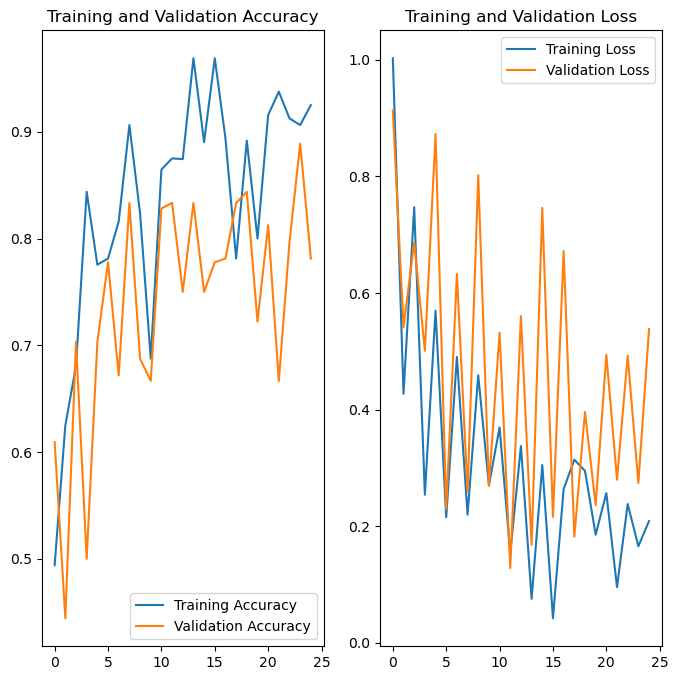

In [15]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [16]:
# Save the model
model.save('potato_model.h5')

In [1]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk

In [3]:
class ImageUploaderApp:
    def __init__(self, master):
        self.master = master
        self.master.title("Image Uploader")

        self.image_label = tk.Label(master)
        self.image_label.pack()

        self.upload_button = tk.Button(master, text="Upload Image", command=self.upload_image)
        self.upload_button.pack()

    def upload_image(self):
        file_path = filedialog.askopenfilename(title="Select Image",
                                               filetypes=(("Image files", "*.jpg;*.jpeg;*.png;*.gif"), ("All files", "*.*")))
        if file_path:
            self.display_image(file_path)

    def display_image(self, file_path):
        image = Image.open(file_path)
        image = image.resize((300, 300), Image.ANTIALIAS)  # Resize the image
        photo = ImageTk.PhotoImage(image)

        self.image_label.configure(image=photo)
        self.image_label.image = photo  # Keep a reference to the image to prevent garbage collection

if __name__ == "__main__":
    root = tk.Tk()
    app = ImageUploaderApp(root)
    root.mainloop()

In [2]:
import tkinter as tk
from tkinter import filedialog, messagebox
from PIL import Image, ImageTk
import numpy as np
import tensorflow as tf

class ImageUploaderApp:
    def __init__(self, master):
        self.master = master
        self.master.title("Image Uploader")

        self.image_label = tk.Label(master)
        self.image_label.pack()

        self.upload_button = tk.Button(master, text="Upload Image", command=self.upload_image)
        self.upload_button.pack()

        # Load your pre-trained model
        self.model = tf.keras.models.load_model('potato_model.h5')

        # Dictionary mapping class indices to animal names
        self.class_index_to_potato = {
            0: "Early Blight",
            1: "Healthy",
            2:"Late Blight"
            
            
            # Add more mappings as per your model's output classes
        }

    def upload_image(self):
        file_path = filedialog.askopenfilename(title="Select Image",
                                               filetypes=(("Image files", "*.jpg;*.jpeg;*.png;*.gif"), ("All files", "*.*")))
        if file_path:
            self.display_image(file_path)
            self.predict_potato(file_path)

    def display_image(self, file_path):
        image = Image.open(file_path)
        image = image.resize((300, 300), Image.ANTIALIAS)  # Resize the image
        photo = ImageTk.PhotoImage(image)

        self.image_label.configure(image=photo)
        self.image_label.image = photo  # Keep a reference to the image to prevent garbage collection

    def preprocess_image(self, image_path):
        img = Image.open(image_path)
        img = img.resize((128, 128))  # Resize the image to match model input size
        img_array = np.array(img) / 255.0  # Normalize the image
        return img_array

    def predict_potato(self, image_path):
        try:
            image_array = self.preprocess_image(image_path)
        # Perform inference using your pre-trained model
            predictions = self.model.predict(np.expand_dims(image_array, axis=0))
            predicted_class = np.argmax(predictions)
            print("Predicted class index:", predicted_class)
            print("Class index to potato mapping:", self.class_index_to_potato)
            predicted_potato = self.class_index_to_potato.get(predicted_class, "Unknown")
            messagebox.showinfo("Prediction", f"The predicted potato is: {predicted_potato}")
        except Exception as e:
            messagebox.showerror("Error", f"An error occurred during prediction: {str(e)}")

if __name__ == "__main__":
    root = tk.Tk()
    app = ImageUploaderApp(root)
    root.mainloop()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


C:\Users\febin\AppData\Local\Temp\ipykernel_30364\73925191.py:40: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = image.resize((300, 300), Image.ANTIALIAS)  # Resize the image


Predicted class index: 1
Class index to potato mapping: {0: 'Early Blight', 1: 'Healthy', 2: 'Late Blight'}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted class index: 0
Class index to potato mapping: {0: 'Early Blight', 1: 'Healthy', 2: 'Late Blight'}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted class index: 1
Class index to potato mapping: {0: 'Early Blight', 1: 'Healthy', 2: 'Late Blight'}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted class index: 2
Class index to potato mapping: {0: 'Early Blight', 1: 'Healthy', 2: 'Late Blight'}
